
image 1/1 c:\Users\tbarron\OneDrive - CONSTRUCTA\Desktop\iaTest\YoloCamV8\img\img1.jpg: 448x640 1 bird, 2 dogs, 258.8ms
Speed: 8.0ms preprocess, 258.8ms inference, 20.0ms postprocess per image at shape (1, 3, 448, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43

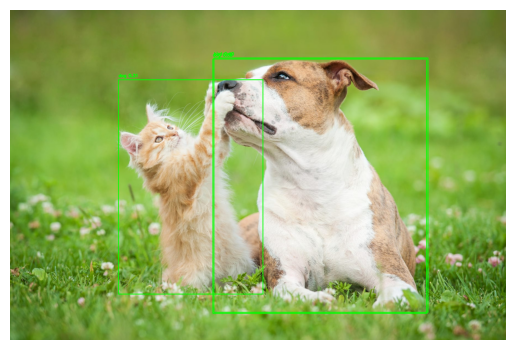


image 1/1 c:\Users\tbarron\OneDrive - CONSTRUCTA\Desktop\iaTest\YoloCamV8\img\img2.jpg: 448x640 1 person, 179.0ms
Speed: 3.0ms preprocess, 179.0ms inference, 3.0ms postprocess per image at shape (1, 3, 448, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knif

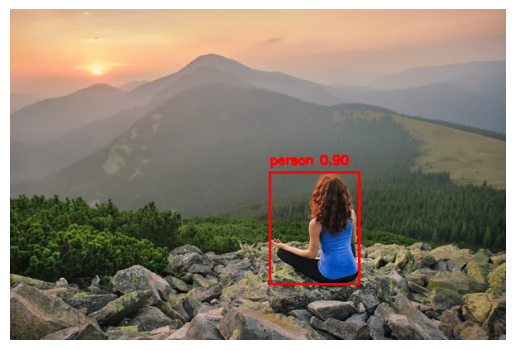


image 1/1 c:\Users\tbarron\OneDrive - CONSTRUCTA\Desktop\iaTest\YoloCamV8\img\img3.jpg: 640x480 23 persons, 203.0ms
Speed: 3.0ms preprocess, 203.0ms inference, 6.0ms postprocess per image at shape (1, 3, 640, 480)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'kn

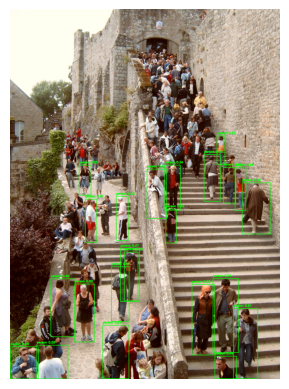


image 1/1 c:\Users\tbarron\OneDrive - CONSTRUCTA\Desktop\iaTest\YoloCamV8\img\img4.jpg: 640x416 6 persons, 310.0ms
Speed: 3.0ms preprocess, 310.0ms inference, 4.0ms postprocess per image at shape (1, 3, 640, 416)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'kni

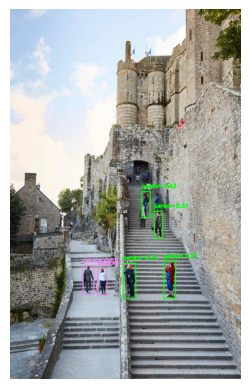

In [3]:
import os
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Charger un modèle YOLOv8 pré-entraîné
model = YOLO('yolov8n.pt')

# Fonction pour afficher les résultats visuellement
def plot_results(results, img_path):
    img = cv2.imread(img_path)
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = box.conf[0]
            cls = box.cls[0]
            label = f'{model.names[int(cls)]} {conf:.2f}'

            # Définir la couleur en fonction de la confiance
            if conf > 0.9:
                color = (0, 0, 255)  # Rouge pour confiance 90-100%
            elif conf > 0.75:
                color = (238, 130, 238)  # Violet pour confiance 75-90%
            else:
                color = (0, 255, 0)  # Vert pour le reste
            
            cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
            print(f'Label: {model.names[int(cls)]}, Probabilité: {conf*100:.2f}%')
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

# Parcourir toutes les images dans le dossier ./img
image_folder = './img'
for img_file in os.listdir(image_folder):
    img_path = os.path.join(image_folder, img_file)
    if os.path.isfile(img_path) and img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
        # Exécuter une inférence sur l'image
        results = model.predict(img_path)
        # Afficher les résultats dans la console
        print(results)
        # Afficher les résultats visuellement
        plot_results(results, img_path)


In [5]:
import cv2
import numpy as np
from ultralytics import YOLO
import threading
import time

# Charger un modèle YOLOv8 pré-entraîné
model = YOLO('yolov8n.pt')

# Fonction pour calculer la couleur en fonction de la confiance
def get_color(conf):
    # Du vert (0, 255, 0) au rouge (0, 0, 255)
    red = int(min(255, 255 * (1 - conf)))
    green = int(min(255, 255 * conf))
    return (0, green, red)


# Fonction pour afficher les résultats visuellement
def plot_results(img, results, person_detected):
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = box.conf[0]
            cls = box.cls[0]
            label = f'{model.names[int(cls)]} {conf*100:.2f}%'

            color = get_color(conf)
            cv2.rectangle(img, (x1, y1), (x2, y2), color, 2)
            cv2.putText(img, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)

            # Afficher le message si une personne est détectée avec une probabilité > 80%
            if model.names[int(cls)] == 'person' and conf * 100 > 80:
                person_detected = True
                cv2.putText(img, 'Personne detectee', (50, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
    
    return person_detected


# Initialiser la capture vidéo depuis la caméra
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Erreur: Impossible d'ouvrir la caméra.")
    exit()

# Fonction pour gérer les modes
mode_detection = False
alarm_disabled = False
person_detected_event = threading.Event()
threading.Thread(daemon=True).start()

while True:
    ret, frame = cap.read()
    if not ret:
        print("Erreur: Impossible de lire le cadre.")
        break

    # Vérifier le mode actuel et exécuter les actions appropriées
    if mode_detection:
        # Exécuter une inférence sur le cadre
        results = model.predict(frame)
        # Afficher les résultats visuellement sur le cadre
        person_detected = plot_results(frame, results, False)
        if person_detected:
            person_detected_event.set()
        else:
            person_detected_event.clear()

    # Afficher le cadre avec les prédictions (ou normal)
    cv2.imshow('YOLOv8 Camera', frame)

    # Gestion des entrées clavier
    key = cv2.waitKey(1) & 0xFF
    if key == ord('q'):
        break
    elif key == ord('d'):
        mode_detection = not mode_detection
    elif key == ord('a'):
        alarm_disabled = not alarm_disabled

# Libérer la capture vidéo et fermer toutes les fenêtres
cap.release()
cv2.destroyAllWindows()



0: 480x640 1 person, 145.0ms
Speed: 3.0ms preprocess, 145.0ms inference, 3.1ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 persons, 129.0ms
Speed: 3.0ms preprocess, 129.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 persons, 129.0ms
Speed: 2.0ms preprocess, 129.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 persons, 128.0ms
Speed: 2.0ms preprocess, 128.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 persons, 132.0ms
Speed: 1.0ms preprocess, 132.0ms inference, 3.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 persons, 135.0ms
Speed: 1.0ms preprocess, 135.0ms inference, 2.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 persons, 132.0ms
Speed: 1.0ms preprocess, 132.0ms inference, 1.0ms postprocess per image at shape (1, 3, 480, 640)

0: 480x640 2 persons, 131.0ms
Speed: 2.0ms preprocess, 131.0ms inference, 2.0ms postprocess per i